In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("/content/sample.csv")

In [3]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [4]:
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

In [5]:
df.dropna(inplace=True)

In [6]:
np.random.seed(42)
df['fare_amount'] = 2.5 + 0.5 * df['trip_duration'] + np.random.normal(0, 1, len(df))

In [7]:
X = df[['PULocationID', 'DOLocationID', 'trip_duration']]
y = df['fare_amount']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 1.21


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

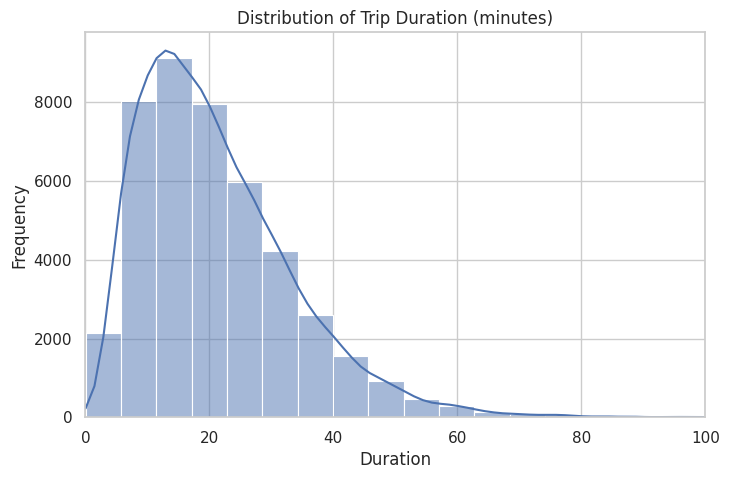

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title("Distribution of Trip Duration (minutes)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.xlim(0, 100)
plt.show()

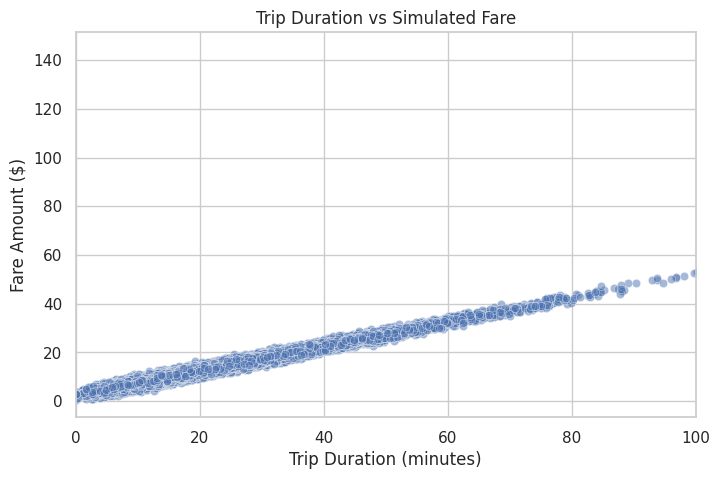

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.5)
plt.title("Trip Duration vs Simulated Fare")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, 100)
plt.show()


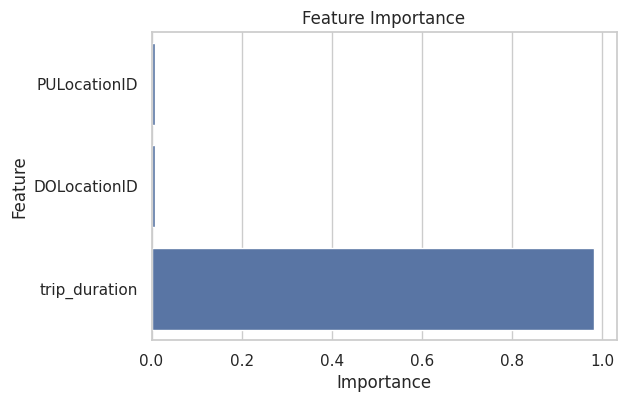

In [15]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score (Accuracy-like): {r2:.2f}")

R² Score (Accuracy-like): 0.97
